# 实践练习 – 预处理

预处理的第一条规则是：**了解您的数据！**

因此，您需要从多个方面和角度了解您的数据，将原始数据转换为已处理数据的状态，以供模型使用。

建议使用 **TBLF** 方法：
+ **尝试：**了解您的问题（在这里指的是了解您的数据）
+ **是否损坏？：**什么损坏了？ （您是否发现数据出现问题）
+ **了解：**为什么出现问题？ （数据存在哪些问题？ 如何解决这些问题？）
+ **修复：**解决问题（怎么做才能为出现问题的数据提供可接受的解决方案？）

## 业务场景
您负责预处理公司要在新机器学习模型中使用的数据。该模型将基于各种来源（包括研究人员、 Web 抓取和出版商）的期刊/出版信息，来预测期刊的平均影响力。

您已经收到了与要解决的业务问题相关的原始数据。您的任务是使用一些描述性统计信息来更好地理解数据。了解数据之后，您需要进行清理并重塑。您将在模型中使用处理过的最终数据集。

## 学习目标
1. 通过使用描述性统计信息分析数据，来了解业务场景和相应的数据集
2. 使用可视化工具为此分析提供支持： 
    – 散点图，用于发现特征之间的相关性 
    – 箱线图和直方图，用于了解数据分布
3. 使用统计工具来支持以前的分析，例如使用相关矩阵来量化各种关系
4. 根据分析结论，通过以下方法为模型准备处理后的数据集：
    – 处理异常值 
    – 处理缺失值
    – 清理数据

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

## 数据集 
数据来自多个来源，包括研究人员、Web 抓取和出版商。数据已经过处理，适合我们的预处理任务。

## 数据架构
一个有关期刊/出版商信息的数据集，包含预估的文章影响分数：
+ journal_name：期刊名称
'+ issn：唯一出版代码
+ citation_count_sum：每份期刊的引用次数总和 
+ paper_count_sum：每份期刊的论文数总和
+ avg_cites_per_paper：每篇论文的平均引用次数
+ ranking：为练习创建的人工标签（可能的值：A、B、C、D）
+ proj_ai：预计的平均影响力

首先要加载文件。

In [2]:
df_journals = pd.read_csv("estimated-article-influence-scores-Exerc2.csv", sep=";")
del df_journals["Unnamed: 0"]

## 粗略浏览数据

#### 了解
您的数据中有多少特征？

In [3]:
print("Number of features: {}".format(df_journals.shape[1]))

Number of features: 7


您有多少样本？

In [4]:
print("Number of samples: {}".format(df_journals.shape[0]))

Number of samples: 3615


> ### 问题 1
> #### 尝试
> 打印前 10 行，看看数据是什么样的。对您的数据集应用 `head` 函数（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head）。

In [5]:
# 在此处输入代码
df_journals.head(10)

,issn,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,ranking,proj_ai
0,2092-6731,3d research,151.0,106.0,1.424528,D,0.290
1,1530-9932,aaps pharmscitech,2208.0,801.0,2.756554,D,0.665
2,1687-0409,abstract and applied analysis,3005.0,2923.0,1.028053,B,0.192
3,1545-7230,academic psychiatry,537.0,490.0,1.095918,NaN,0.208
4,1936-4709,academic questions,40.0,67.0,0.597015,A,0.097
5,1432-0517,accreditation and quality assurance,255.0,331.0,0.770393,A,0.134
6,1839-2571,acoustics australia,30.0,25.0,1.200000,D,0.234
7,2199-6067,acrocephalus,9.0,15.0,0.600000,C,0.098
8,1846-0453,acta adriatica,28.0,37.0,0.756757,NaN,0.131
9,1854-1941,acta agriculturae slovenica,71.0,97.0,0.731959,C,0.125


## 处理缺失值
#### 了解
检查每列缺失多少个值。

对于数据集中存在缺失值的每个单元格，**isnull()** 命令会返回 **True**。

In [6]:
df_journals.isnull().head(10)

,issn,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,ranking,proj_ai
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False


#### 是否损坏？
这种可视化对于大型数据集来说是不切实际的。您可以尝试对每一列的所有行求和。由于上述所有值都是布尔值，因此，如果按列（特征）来求和，您将得到 **true** 值的数量，即每个特征的缺失值的数量。

> ### 问题 2
> #### 修复
> 如上所述，对您的数据集应用 **.isnull()** 函数，但将得到的结果与 **.sum()** 函数连接起来，以显示每个特征的缺失值的数量。<br/>

>`isnull`（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull)）<br/>
>`sum`（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum)）

In [7]:
# 在此处输入代码
df_journals.isnull().sum()

issn                   0  
journal_name           0  
citation_count_sum     12 
paper_count_sum        12 
avg_cites_per_paper    12 
ranking                633
proj_ai                12 
dtype: int64

#### 了解
您观察到数据集中存在缺失值。

缺失值是一个非常重要的问题。大多数模型都无法很好地处理缺失值问题。

您可以删除缺失值或替换这些值。这两种选择都有优缺点，具体取决于特定特征对您训练作业的重要性，以及您是否可以删除那些缺失值等。

以下命令仅筛选具有 `any`（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html?highlight=any#pandas.DataFrame.any)）缺失值的行。将显示前 10 行。

In [8]:
df_journals_null_data = df_journals[df_journals.isnull().any(axis=1)]
df_journals_null_data.head(10)

,issn,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,ranking,proj_ai
3,1545-7230,academic psychiatry,537.0,490.0,1.095918,NaN,0.208
8,1846-0453,acta adriatica,28.0,37.0,0.756757,NaN,0.131
18,1614-7065,acta chimica sinica,619.0,537.0,1.152700,NaN,0.222
25,1958-5454,acta endoscopica,31.0,70.0,0.442857,NaN,0.067
38,0386-300X,acta medica okayama,257.0,228.0,1.127193,NaN,0.216
46,1745-3674,acta orthopaedica,2364.0,611.0,3.869067,NaN,1.019
60,0303-464X,acta reumatologica portuguesa,213.0,205.0,1.039024,NaN,0.195
70,1940-0640,addiction science & clinical practice,294.0,133.0,2.210526,NaN,0.504
91,1687-711X,advances in fuzzy systems,128.0,107.0,1.196262,NaN,0.233
95,1687-7365,advances in high energy physics,791.0,373.0,2.120643,NaN,0.478


## 处理缺失值
#### 修复
假设您决定删除存在缺失值的行。

您可以通过对数据集应用 `dropna` 函数（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna)）来删除缺失值。将结果保存在名为 *df_journals_no_miss** 的新数据集中。然后使用 `shape` 函数 ([文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape)) 来确认数据集已经删除了这些行。

#### 了解
剩下多少行？

In [9]:
df_journals_no_miss = df_journals.dropna()
df_journals_no_miss.shape

(2972, 7)

#### 了解
确认您已删除所有缺失值。

In [10]:
df_journals_no_miss.isna().any()

issn                   False
journal_name           False
citation_count_sum     False
paper_count_sum        False
avg_cites_per_paper    False
ranking                False
proj_ai                False
dtype: bool

现在，假设您无法删除存在缺失值的行，可能是因为您不想缩小本来就很小的数据集。

## 替换数值
#### 了解
替换数值的一种方法是要考虑特征（列）值的平均值。以下命令可以计算数据集中所有数值特征的平均值。

In [11]:
citation_count_sum_MEAN = df_journals["citation_count_sum"].mean()
paper_count_sum_MEAN = df_journals["paper_count_sum"].mean()
avg_cites_per_paper_MEAN = df_journals["avg_cites_per_paper"].mean()
proj_ai_MEAN = df_journals["proj_ai"].mean()
print("citation_count_sum_MEAN: {}".format(citation_count_sum_MEAN))
print("paper_count_sum_MEAN: {}".format(paper_count_sum_MEAN))
print("avg_cites_per_paper_MEAN: {}".format(avg_cites_per_paper_MEAN))
print("proj_ai_MEAN: {}".format(proj_ai_MEAN))

citation_count_sum_MEAN: 1446.713849569803
paper_count_sum_MEAN: 509.67110741049123
avg_cites_per_paper_MEAN: 2.118970176206784
proj_ai_MEAN: 0.5165542603386052


以下命令将使用计算出的特征平均值来更新每个缺失值。

**请注意：**`inplace` 子句（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna)）意味着更新已在原始数据集上生效，因此您无需将结果归到新数据集。

In [12]:
df_journals["citation_count_sum"].fillna(citation_count_sum_MEAN, inplace=True)
df_journals["paper_count_sum"].fillna(paper_count_sum_MEAN, inplace=True)
df_journals["avg_cites_per_paper"].fillna(avg_cites_per_paper_MEAN, inplace=True)
df_journals["proj_ai"].fillna(proj_ai_MEAN, inplace=True)

#### 了解
确认您已替换所有数值。接下来，您要处理分类值。

In [13]:
df_journals.isna().any()

issn                   False
journal_name           False
citation_count_sum     False
paper_count_sum        False
avg_cites_per_paper    False
ranking                True 
proj_ai                False
dtype: bool

## 替换分类值
#### 了解
对于分类值替换，一种常见的方法是使用最频繁出现的值（众数）。

#### 尝试
查看“排名”特征的可能值。

Pandas 有一个很有趣的命令，可以显示分类的频率：`value_counts`（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts)）。

将此命令应用于数据集中的“排名”特征，以查看它的分类分布。

In [14]:
df_journals["ranking"].value_counts()

D    1222
B    590 
A    589 
C    581 
Name: ranking, dtype: int64

现在，查看分类特征最频繁出现的值是什么。使用 `mode` 函数（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html?highlight=mode#pandas.DataFrame.mode)）。

**请注意：** 您可以使用 `df_journals [“ ranking”]` 或 `df_journals.ranking` 访问该特征。

In [15]:
df_journals.ranking.mode()[0]

'D'

#### 了解
该命令返回的最频繁出现的值（众数）是 **D**。

使用替换数值特征时所用的相同命令来替换最频繁出现的 **D**。

In [16]:
df_journals["ranking"].fillna('D', inplace=True)

#### 了解
现在，运行以下命令，查看是否还有空值。您现在应该只有 **False** 值。

In [17]:
df_journals.isna().any()

issn                   False
journal_name           False
citation_count_sum     False
paper_count_sum        False
avg_cites_per_paper    False
ranking                False
proj_ai                False
dtype: bool

#### 了解
为了确保将缺失值替换为 D，**value_counts()** 命令应该会显示分类值 **D** 的新数量是原始值和空值数量的总和。

In [18]:
df_journals["ranking"].value_counts()

D    1855
B    590 
A    589 
C    581 
Name: ranking, dtype: int64

#### 是否损坏？
当标签之间的分布显示某些标签的频率比其他标签高得多时，就会出现不平衡的标签。这种情况并不适用于该数据集。

## 数值的基本统计信息
#### 了解分布
##### 尝试
计算每列的最小值、最大值、平均值、标准差以及 25% 和 75% 百分位数。使用 `describe` 命令（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)）。

In [19]:
df_journals.describe()

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,1446.713850,509.671107,2.118970,0.516554
std,7983.573195,1920.708341,1.685032,0.571603
min,0.000000,1.000000,0.000000,0.000000
25%,151.000000,107.000000,1.056067,0.199000
50%,424.000000,240.000000,1.722628,0.368000
75%,1113.500000,520.500000,2.705021,0.649500
max,426949.000000,104705.000000,26.318824,11.367000


> ### 问题 3
绘制“avg_cites_per_paper”特征的分布图。使用 matplotlib 中的 `.plot.hist(bins=100)` 函数绘制每个特征的分布。

>`hist`（[文档](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)）

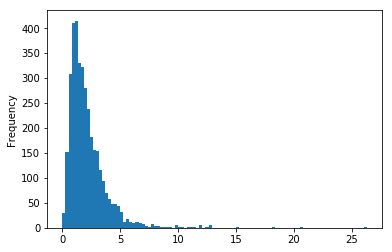

In [20]:
# 在此处输入代码
df_journals["avg_cites_per_paper"].plot.hist(bins=100)

## 箱线图
箱线图非常适合发现异常值。我们使用箱线图进行了解。

>### 问题 4
>#### 尝试
> 现在，使用与绘制分布相同的方法，使用 `boxplot` 函数（[箱线图](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot)）为数字特征“avg_cites_per_paper”绘制箱线图。

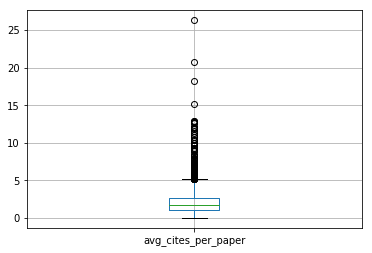

In [21]:
# 在此处输入代码
df_journals.boxplot(["avg_cites_per_paper"])

#### 了解 
请注意，箱线图有助于发现异常值。

#### 了解
现在，我们使用一种更有趣的技术，通过百分位数来删除异常值。

要打印数据集数值的百分位数，请使用 **.describe()** 命令。

In [22]:
df_journals.describe()

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,1446.713850,509.671107,2.118970,0.516554
std,7983.573195,1920.708341,1.685032,0.571603
min,0.000000,1.000000,0.000000,0.000000
25%,151.000000,107.000000,1.056067,0.199000
50%,424.000000,240.000000,1.722628,0.368000
75%,1113.500000,520.500000,2.705021,0.649500
max,426949.000000,104705.000000,26.318824,11.367000


您将使用 25%、50% 和 75% 百分位数（或四分位数）作为准则来删除异常值。

对于每个特征，您将删除四分位数范围 (IQR) 之外的所有数据点，其中：

$$IQR = 75\% \space quartile - 25\% \space quartile$$
$$Lower \space Threshold = 50\% \space percentile - 1.5 * IQR$$
$$Upper \space Threshold = 50\% \space percentile + 1.5 * IQR$$

NumPy 软件包的 `percentile` 函数（[文档](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html?highlight=percentile#numpy.percentile)）可以帮助您获取阈值。

>### 问题 5（可选）
>#### 尝试
>** 这个问题是可选的，不会计入评分**，但这是锻炼好奇心的好方法!

> 使用 NumPy **percentile** 函数实施以下算法。

#### 修复
对“citation_count_sum”特征执行以下操作：
+ 使用上面的准则和 **percentile** 函数计算每个特征的阈值。
+ 删除每个特征存在的超出此范围的异常值。
+ 再次绘制箱线图以查看结果。
+ 在删除前后使用 **shape** 命令查看删除了多少行。

Number of samples before: 3615
Number of samples after: 3066


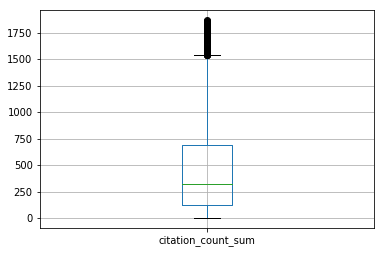

In [23]:
# 在此处输入代码
print("Number of samples before: {}".format(df_journals.shape[0]))
# Save the quartiles
citation_count_sum_25 = np.percentile(df_journals['citation_count_sum'], 25)
citation_count_sum_50 = np.percentile(df_journals['citation_count_sum'], 50)
citation_count_sum_75 = np.percentile(df_journals['citation_count_sum'], 75)

# Calculate the thresholds
IQR_citation_count_sum = citation_count_sum_75 - citation_count_sum_25
Lower_Limit = citation_count_sum_50 - IQR_citation_count_sum * 1.5
Upper_Limit = citation_count_sum_50 + IQR_citation_count_sum * 1.5

# Remove the outliers
df_journals = df_journals.loc[(df_journals['citation_count_sum'] > Lower_Limit) &amp;
                              (df_journals['citation_count_sum'] &lt; Upper_Limit)]
df_journals.boxplot(["citation_count_sum"])
print("Number of samples after: {}".format(df_journals.shape[0]))

#### 了解
非常好！ 您已成功删除了异常值。

## 相关性：多变量统计
#### 尝试
对所有特征使用相关矩阵，为数据集中数值特征的每种组合绘制散点图。

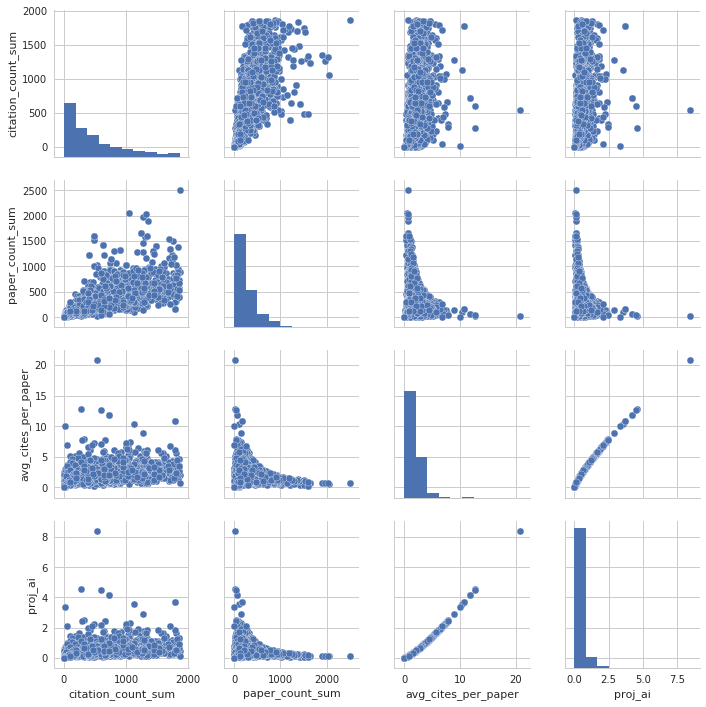

In [24]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(df_journals[["citation_count_sum", "paper_count_sum",
                        "avg_cites_per_paper","proj_ai"]])

#### 是否损坏？
有一个高度相关的特征。

#### 了解
可以看到，proj_ai x avg_cites_per_paper 之间存在很强的非线性相关性，
其他变量之间也存在一些相关性。
但我们需要数字来决定是否删除一些高度相关的特征。
所以，具有值的热图非常有帮助。

> ### 问题 6
> #### 尝试
> 在 df_journal dataframe 中使用 `corr` 函数（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr)）来打印相关性。

In [25]:
# 在此处输入代码
corr = df_journals.corr()
corr

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai
citation_count_sum,1.000000,0.726903,0.461533,0.412112
paper_count_sum,0.726903,1.000000,-0.027235,-0.042036
avg_cites_per_paper,0.461533,-0.027235,1.000000,0.987752
proj_ai,0.412112,-0.042036,0.987752,1.000000


##### 学习
请注意，对角线始终为 1（一），因为它表示针对自身的变量。

##### 是否损坏？
**proj_ai** 和 **avg_cites_per_paper** 变量高度相关（高于 99%）。

#### 修复
我们来尝试删除其中一个特征。您将从数据集中删除 **proj_ai** 特征。

In [26]:
del df_journals["proj_ai"]

#### 了解
现在，使用另一个很棒的工具，即 `heatmap`（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr)），在删除相关之后确认变量与目标之间的相关性。

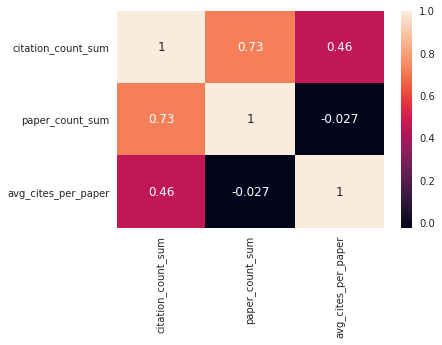

In [27]:
corr = df_journals.corr()
ax = sns.heatmap(corr, annot=True,)

## 总结

在本练习中，您练习了多种了解数据的方法。

您从多个方面和角度了解了您的数据，将原始数据转换为已处理数据的状态，以供模型使用。

您查看了一个简短的业务场景和相应的数据集，使用描述性统计信息对数据进行了分析，以便更好地了解数据。

您使用了可视化工具（包括箱线图以及直方图）来支持此分析并了解数据的分布。在散点图的帮助下，您应用了多变量统计信息以发现特征之间的相关性。

在**问题 1** 中，您发现了粗略浏览数据的重要性，查看了特征的数量以及样本的数量。您查看了第一行，看是否有什么需要注意的内容，例如缺失值。

在**问题 2** 中，您学习并练习了如何决定是删除还是替换缺失值。在替换缺失值部分，您练习了如何处理数字替换或分类替换。

**问题 3** 帮您了解了可以应用于您数据的基本统计信息。您练习了绘制特征的分布。

在**问题 4** 中，您练习了另一个重要的数字特征图：箱线图。这是一个非常棒的工具，可用于发现异常值。

**问题 5** 向您展示了一个有趣的指南，指导您使用百分位数删除异常值。您尝试实施了该算法。

最后，在**问题 6** 中，您了解并练习了使用多变量技术（如相关矩阵和散点图）来发现特征之间的相关性，以及如何进行处理。

### 做得好！
现在，您已经清理了数据集，并已做好准备，可以进入建模步骤。
